In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('day - day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
df.shape

(730, 16)

In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# Dropping 'instant', 'dteday', 'casual', 'registered' as this features does not help in improving model performance
new_df=df[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]
new_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [8]:
new_df.shape

(730, 12)

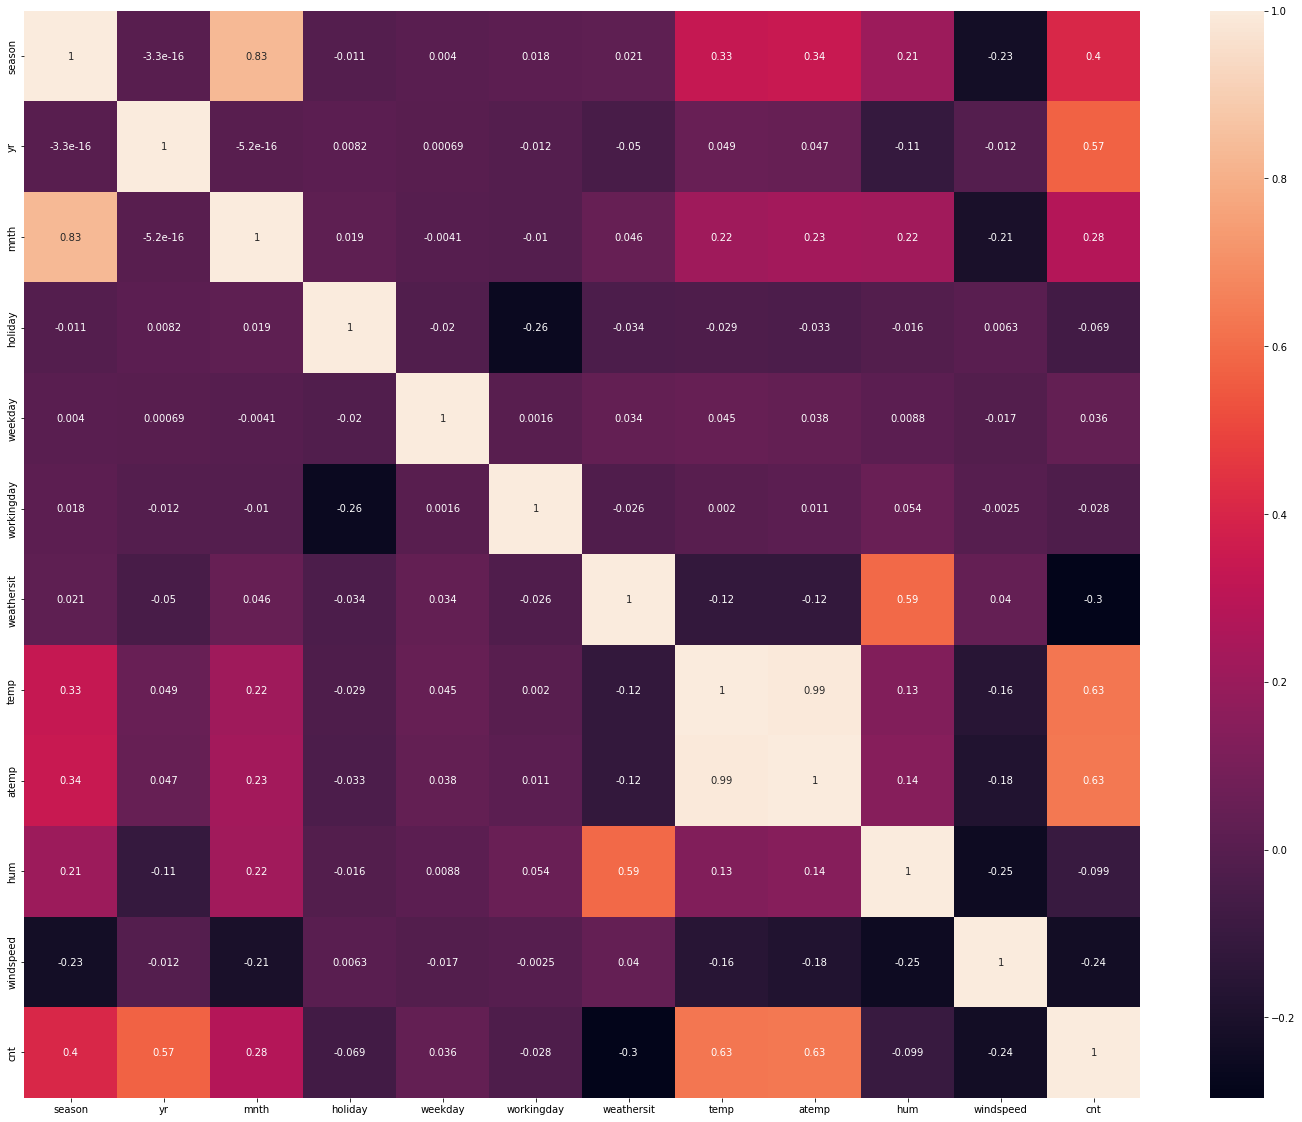

In [9]:
import seaborn as sns
plt.figure(figsize = [25,20])
sns.heatmap(new_df.corr(),annot =True)
plt.show()

In [10]:
new_df['mnth'].unique(),new_df['weekday'].unique(),new_df['season'].unique(),new_df['weathersit'].unique()

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64),
 array([1, 2, 3, 4, 5, 6, 0], dtype=int64),
 array([1, 2, 3, 4], dtype=int64),
 array([2, 1, 3], dtype=int64))

In [11]:
new_df['season']=new_df['season'].astype('category')
new_df['weathersit']=new_df['weathersit'].astype('category')
new_df['mnth']=new_df['mnth'].astype('category')
new_df['weekday']=new_df['weekday'].astype('category')

In [12]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [13]:
new_df = pd.get_dummies(new_df, drop_first=True)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [14]:
new_df.shape

(730, 30)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [16]:
num_vars =['temp', 'atemp', 'hum', 'windspeed','cnt']

new_df[num_vars] = scaler.fit_transform(new_df[num_vars])

In [17]:
new_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,1,0.355170,0.373517,0.828620,0.284606,0.110792,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,0.379232,0.360541,0.715771,0.466215,0.089623,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,0.171000,0.144830,0.449638,0.465740,0.152669,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,0.175530,0.174649,0.607131,0.284297,0.177174,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0.209120,0.197158,0.449313,0.339143,0.181546,0,0,...,0,0,0,0,0,0,1,0,0,0


In [18]:
new_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,0.543852,0.519090,0.645400,0.346568,0.516108,0.252055,0.257534,...,0.082192,0.084932,0.143836,0.143836,0.142466,0.142466,0.142466,0.142466,0.336986,0.028767
std,0.500343,0.167266,0.462641,0.228140,0.213968,0.146402,0.159873,0.222735,0.434490,0.437576,...,0.274845,0.278971,0.351164,0.351164,0.349767,0.349767,0.349767,0.349767,0.473004,0.167266
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.346084,0.339611,0.534704,0.232045,0.362143,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,0.548307,0.535942,0.643959,0.326928,0.520766,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.743261,0.695494,0.750535,0.434629,0.683847,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
x = new_df.drop(['cnt'], axis=1)
y = new_df['cnt']

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

model = LinearRegression()

model.fit(x_train, y_train)

model.score(x_test, y_test)

0.8352932496055677

In [21]:
from sklearn.feature_selection import RFE
Lin = LinearRegression()
Lin.fit(x_train, y_train)
RF = RFE(Lin, 15)             
RF = RF.fit(x_train, y_train)

In [22]:
list(zip(x_train, RF.support_, RF.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 10),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 8),
 ('mnth_3', False, 2),
 ('mnth_4', False, 15),
 ('mnth_5', False, 4),
 ('mnth_6', False, 9),
 ('mnth_7', True, 1),
 ('mnth_8', False, 12),
 ('mnth_9', True, 1),
 ('mnth_10', False, 3),
 ('mnth_11', True, 1),
 ('mnth_12', True, 1),
 ('weekday_1', False, 5),
 ('weekday_2', False, 7),
 ('weekday_3', False, 6),
 ('weekday_4', False, 14),
 ('weekday_5', False, 13),
 ('weekday_6', False, 11),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [23]:
col = x_train.columns[RF.support_]
col

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_7', 'mnth_9', 'mnth_11', 'mnth_12',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [24]:
x_train_rfe = x_train[col]

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,1272.17
2,temp,1259.61
4,hum,17.78
7,season_3,7.80
5,windspeed,4.93
6,season_2,4.14
8,season_4,4.10
13,weathersit_2,2.14
0,yr,2.05
11,mnth_11,1.93


In [26]:
import statsmodels.api as sm
X_train_lm1 = sm.add_constant(x_train_rfe)
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [27]:
lr1.params

const           0.227441
yr              0.226087
holiday        -0.071677
temp            0.098258
atemp           0.362899
hum            -0.166266
windspeed      -0.141555
season_2        0.144810
season_3        0.118950
season_4        0.220390
mnth_7         -0.045372
mnth_9          0.063208
mnth_11        -0.073226
mnth_12        -0.060004
weathersit_2   -0.052521
weathersit_3   -0.201567
dtype: float64

In [28]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     172.0
Date:                Sat, 30 Jul 2022   Prob (F-statistic):          3.11e-185
Time:                        22:27:23   Log-Likelihood:                 508.90
No. Observations:                 511   AIC:                            -985.8
Df Residuals:                     495   BIC:                            -918.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2274      0.030      7.664   

In [29]:
x_train1 = x_train_rfe.drop(['atemp'],axis=1)

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x_train1.columns
vif['VIF'] = [variance_inflation_factor(x_train1.values, i) for i in range(x_train1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,25.97
3,hum,16.39
6,season_3,7.74
4,windspeed,4.59
5,season_2,4.11
7,season_4,4.08
12,weathersit_2,2.10
0,yr,2.05
10,mnth_11,1.93
8,mnth_7,1.85


In [31]:
X_train_lm2 = sm.add_constant(x_train1)
lr2 = sm.OLS(y_train, X_train_lm2).fit()
lr2.params

const           0.231803
yr              0.226114
holiday        -0.074271
temp            0.437474
hum            -0.160441
windspeed      -0.153209
season_2        0.146753
season_3        0.116769
season_4        0.222379
mnth_7         -0.043876
mnth_9          0.063044
mnth_11        -0.072593
mnth_12        -0.059022
weathersit_2   -0.053819
weathersit_3   -0.206948
dtype: float64

In [32]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.8
Date:                Sat, 30 Jul 2022   Prob (F-statistic):          6.23e-186
Time:                        22:27:24   Log-Likelihood:                 507.84
No. Observations:                 511   AIC:                            -985.7
Df Residuals:                     496   BIC:                            -922.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2318      0.030      7.845   

In [33]:
x_train1 = x_train1.drop(['hum'],axis=1)

In [34]:
vif = pd.DataFrame()
vif['Features'] = x_train1.columns
vif['VIF'] = [variance_inflation_factor(x_train1.values, i) for i in range(x_train1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,16.27
5,season_3,7.38
6,season_4,4.08
3,windspeed,4.02
4,season_2,4.01
0,yr,2.04
9,mnth_11,1.88
7,mnth_7,1.83
11,weathersit_2,1.55
8,mnth_9,1.52


In [35]:
X_train_lm3 = sm.add_constant(x_train1)
lr3 = sm.OLS(y_train, X_train_lm3).fit()
lr3.params

const           0.136328
yr              0.230990
holiday        -0.076026
temp            0.412090
windspeed      -0.117939
season_2        0.149251
season_3        0.120694
season_4        0.219617
mnth_7         -0.039091
mnth_9          0.056048
mnth_11        -0.072994
mnth_12        -0.064279
weathersit_2   -0.079224
weathersit_3   -0.253423
dtype: float64

In [36]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     190.3
Date:                Sat, 30 Jul 2022   Prob (F-statistic):          2.31e-183
Time:                        22:27:24   Log-Likelihood:                 498.98
No. Observations:                 511   AIC:                            -970.0
Df Residuals:                     497   BIC:                            -910.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1363      0.019      7.145   

In [37]:
x_train1 = x_train1.drop(['season_3'],axis=1)

In [38]:
vif = pd.DataFrame()
vif['Features'] = x_train1.columns
vif['VIF'] = [variance_inflation_factor(x_train1.values, i) for i in range(x_train1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.11
3,windspeed,3.88
5,season_4,2.43
0,yr,2.03
4,season_2,1.99
8,mnth_11,1.79
6,mnth_7,1.71
10,weathersit_2,1.55
7,mnth_9,1.37
9,mnth_12,1.29


In [39]:
X_train_lm4 = sm.add_constant(x_train1)
lr4 = sm.OLS(y_train, X_train_lm4).fit()
lr4.params

const           0.111196
yr              0.229187
holiday        -0.082473
temp            0.555849
windspeed      -0.116278
season_2        0.085897
season_4        0.164088
mnth_7         -0.016721
mnth_9          0.083816
mnth_11        -0.047445
mnth_12        -0.053009
weathersit_2   -0.078583
weathersit_3   -0.246350
dtype: float64

In [40]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     192.9
Date:                Sat, 30 Jul 2022   Prob (F-statistic):          1.93e-178
Time:                        22:27:25   Log-Likelihood:                 484.54
No. Observations:                 511   AIC:                            -943.1
Df Residuals:                     498   BIC:                            -888.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1112      0.019      5.850   

In [41]:
x_train1 = x_train1.drop(['mnth_7','mnth_11'],axis=1)

In [42]:
vif = pd.DataFrame()
vif['Features'] = x_train1.columns
vif['VIF'] = [variance_inflation_factor(x_train1.values, i) for i in range(x_train1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.08
3,windspeed,3.70
0,yr,2.03
4,season_2,1.66
8,weathersit_2,1.54
5,season_4,1.45
6,mnth_9,1.23
7,mnth_12,1.19
9,weathersit_3,1.09
1,holiday,1.03


In [43]:
X_train_lm5 = sm.add_constant(x_train1)
lr5 = sm.OLS(y_train, X_train_lm5).fit()
lr5.params

const           0.106229
yr              0.229450
holiday        -0.084143
temp            0.554425
windspeed      -0.117427
season_2        0.091042
season_4        0.148087
mnth_9          0.093157
mnth_12        -0.039037
weathersit_2   -0.076149
weathersit_3   -0.242652
dtype: float64

In [44]:
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     228.2
Date:                Sat, 30 Jul 2022   Prob (F-statistic):          3.35e-179
Time:                        22:27:25   Log-Likelihood:                 480.74
No. Observations:                 511   AIC:                            -939.5
Df Residuals:                     500   BIC:                            -892.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1062      0.019      5.679   

In [45]:
x_train1 = x_train1.drop(['mnth_12'],axis=1)

In [46]:
vif = pd.DataFrame()
vif['Features'] = x_train1.columns
vif['VIF'] = [variance_inflation_factor(x_train1.values, i) for i in range(x_train1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.05
3,windspeed,3.68
0,yr,2.01
4,season_2,1.65
7,weathersit_2,1.52
5,season_4,1.39
6,mnth_9,1.22
8,weathersit_3,1.08
1,holiday,1.03


In [47]:
# Add a constant
X_train_lm6 = sm.add_constant(x_train1)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()
lr6.params

const           0.097266
yr              0.228640
holiday        -0.085540
temp            0.564291
windspeed      -0.112083
season_2        0.093071
season_4        0.144873
mnth_9          0.095633
weathersit_2   -0.077734
weathersit_3   -0.247206
dtype: float64

In [48]:
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     251.0
Date:                Sat, 30 Jul 2022   Prob (F-statistic):          2.58e-179
Time:                        22:27:26   Log-Likelihood:                 478.15
No. Observations:                 511   AIC:                            -936.3
Df Residuals:                     501   BIC:                            -893.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0973      0.018      5.299   

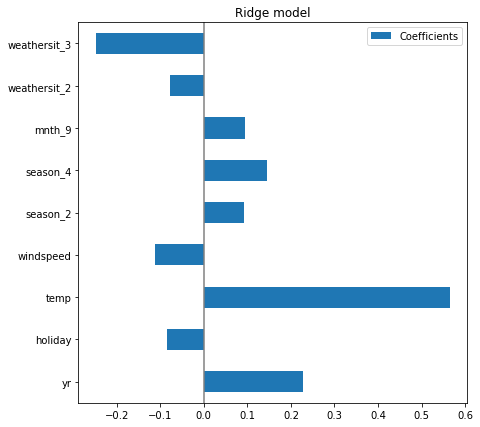

In [58]:
import matplotlib.pyplot as plt

coefs = pd.DataFrame(lr6.params,columns=['Coefficients'], index=x_train1.columns)

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Ridge model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [49]:
y_pred = lr6.predict(X_train_lm6)

In [50]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred)

0.8184617933985725

In [51]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train, y_pred)
mse

0.009011157679734512

In [52]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_train, y_pred)
mae

0.07127116716002467

Text(0.5, 0, 'Errors')

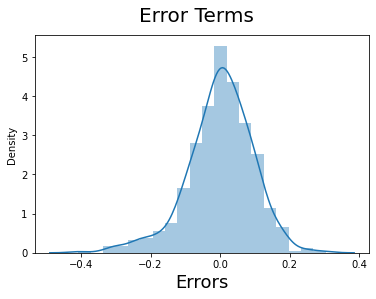

In [53]:
res = y_train-y_pred
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18) 

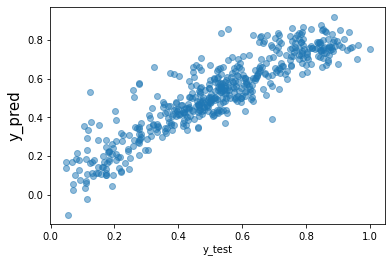

In [54]:
fig = plt.figure()
plt.scatter(y_train, y_pred, alpha=.5, cmap=True)             
plt.xlabel('y_test', fontsize = 10)                          
plt.ylabel('y_pred', fontsize = 15) 
plt.show()